#### Analysis of w+; UAS-ArcLight/ +; R24E09-Gal4/ VT50384-lexA, lexAop-TNT Flies (Block flies)

In [1]:
# Python_version 2.7.15

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import os
import scipy.io
from scipy import stats
%matplotlib inline
import octopus as oct

In [2]:
filenames =['R24E09-ArcLight_50384-TNT001_2020-05-26_11.58VT50384lexA-TNT_Ftrace_mean',
            'R24E09-ArcLight_50384-TNT004_2020-05-26_13.12VT50384lexA-TNT_Ftrace_mean',
            'R24E09-ArcLight_50384-TNT_SING001_2020-05-27_11.59VT50384lexA-TNT_Ftrace_mean',
            'R24E09-ArcLight_50384-TNT_SING005_2020-05-27_15.46VT50384lexA-TNT_Ftrace_mean',
            'R24E09-ArcLight_50384-TNT_SING001_2020-05-28_11.36VT50384lexA-TNT_Ftrace_mean',
            'R24E09-ArcLight_50384-TNT_SING002_2020-05-30_12.36VT50384lexA-TNT_Ftrace_mean',
            'R24E09-ArcLight_50384-TNT_SING004_2020-05-30_13.26VT50384lexA-TNT_Ftrace_mean']

In [3]:
# Import Data
time = np.load('time.npy')

for i in range(len(filenames)):
    a = np.load(filenames[i] + '.npy')
    if(i==0):
        Ftrace_all = a
    if(i==1):
        Ftrace_all = np.stack((Ftrace_all,a), axis=2)   
    if(i>1):
        a = a[:,:,np.newaxis]
        Ftrace_all = np.concatenate((Ftrace_all,a), axis=2)   

In [4]:
R24E09_TNT_Ctrl_Ftrace_all = np.load('R24E09_TNT_Ctrl_Ftrace_all.npy')
R24E09_TNT_Ctrl_Ftrace_mean = np.load('R24E09_TNT_Ctrl_Ftrace_mean.npy')
R24E09_TNT_Ctrl_MOI = np.load('R24E09_TNT_Ctrl_MOI.npy')
R24E09_TNT_Ctrl_LDir = np.load('R24E09_TNT_Ctrl_LDir.npy')

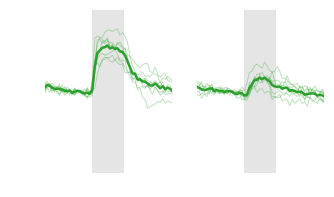

In [5]:
fig = plt.figure(figsize = (5,3))

ax = fig.add_subplot(121)
plt.plot(time,Ftrace_all[:,6,:], color = 'C2', alpha = 0.3, linewidth = 1)
plt.plot(time,np.mean(Ftrace_all[:,6,:], axis=1), color = 'C2', linewidth = 2.5)
plt.axvspan(0, 1, facecolor='0.5', alpha=0.2)
plt.xlim([-1.5,2.5])
plt.ylim([-0.14,0.14])
plt.axis('off') 

ax = fig.add_subplot(122)
plt.plot(time,Ftrace_all[:,2,:], color = 'C2', alpha = 0.3, linewidth = 1)
plt.plot(time,np.mean(Ftrace_all[:,2,:], axis=1), color = 'C2', linewidth = 2.5)
plt.axvspan(0, 1, facecolor='0.5', alpha=0.2)
plt.xlim([-1.5,2.5])
plt.ylim([-0.14,0.14])
plt.axis('off')

bbox_inches = 'tight'
#plt.savefig('Fig2_R24E09_50384-TNT_Ftraces.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

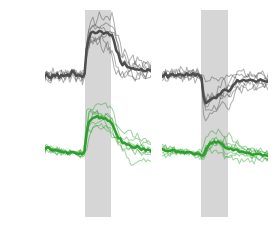

In [6]:
fig = plt.figure(figsize = (4, 3.8))

plt.subplots_adjust(wspace=0.1)

data = [R24E09_TNT_Ctrl_Ftrace_all, Ftrace_all]
colors = ['0.3', 'C2']
vsize = 0.14
alpha = 0.45

ax = fig.add_subplot(121)
plt.plot(time, data[0][:,6,:] + vsize*1.2, color = colors[0], alpha = alpha, linewidth = 1)
plt.plot(time, np.mean(data[0][:,6,:], axis=1)+ vsize*1.2, colors[0], linewidth = 2.5)

plt.plot(time, data[1][:,6,:], color = colors[1], alpha = alpha, linewidth = 1)
plt.plot(time, np.mean(data[1][:,6,:], axis=1), color = colors[1], linewidth = 2.5)

plt.axvspan(0, 1, facecolor='0.2', alpha=0.2)
plt.xlim([-1.5,2.5])
plt.ylim([-vsize,+vsize*2.2])
plt.axis('off') 


ax = fig.add_subplot(122)
plt.plot(time, data[0][:,2,:] + vsize*1.2, color = colors[0], alpha = alpha, linewidth = 1)
plt.plot(time, np.mean(data[0][:,2,:], axis=1)+ vsize*1.2, colors[0], linewidth = 2.5)

plt.plot(time,data[1][:,2,:], color = colors[1], alpha = alpha, linewidth = 1)
plt.plot(time,np.mean(data[1][:,2,:], axis=1), color = colors[1], linewidth = 2.5)

plt.axvspan(0, 1, facecolor='0.2', alpha=0.2)
plt.xlim([-1.5,2.5])
plt.ylim([-vsize,+vsize*2.2])
plt.axis('off')

bbox_inches = 'tight'
#plt.savefig('Fig2_R24E09_50384-TNT_Ftraces.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

In [7]:
rotations = [0,45,90,135,180,225,270,315,360]
Ftrace_mean = np.zeros([len(rotations),len(filenames)])
Ftrace_sem = np.zeros([len(rotations)])
for i in range(len(rotations)):
    Ftrace_sem[i] = stats.sem(np.mean(Ftrace_all[38:51,i,:],0))
    for j in range(len(filenames)):
        Ftrace_mean[i,j] = np.mean(Ftrace_all[np.int(np.where(time == 0)[0]):51,i,j])

In [8]:
R24E09_TNT_Ctrl_Ftrace_sem= stats.sem(R24E09_TNT_Ctrl_Ftrace_mean,1)

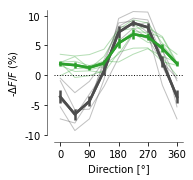

In [9]:
fig = plt.figure(figsize = (2.3, 2.3))

ax = fig.add_subplot(111) #PLOT directional tuning


ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)
plt.plot(rotations, R24E09_TNT_Ctrl_Ftrace_mean, color='0.3', linewidth = 1, zorder = 0, alpha=0.35)
plt.plot(rotations, np.mean(R24E09_TNT_Ctrl_Ftrace_mean,1), linewidth = 2.5, color = '0.3')
plt.errorbar(rotations, np.mean(R24E09_TNT_Ctrl_Ftrace_mean,1), yerr = R24E09_TNT_Ctrl_Ftrace_sem, linewidth = 2.5, color = '0.3')

plt.plot(rotations, Ftrace_mean, color='C2', linewidth = 1, zorder = 0, alpha=0.35)
plt.plot(rotations, np.mean(Ftrace_mean,1), linewidth = 2.5, color = 'C2')
plt.errorbar(rotations, np.mean(Ftrace_mean,1), yerr = Ftrace_sem, linewidth = 2.5, color = 'C2')


plt.xticks(rotations)
ax.set_xticklabels(rotations)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(0.5)
ax.set_xlabel(u'Direction [°]', fontsize = 10)
ax.set_ylabel('-$\Delta F/F$ (%)', fontsize = 10)
yticks = np.array([-0.1,-0.05,0,0.05,0.1])
ax.set_yticks(yticks)
ax.set_yticklabels(('-10','-5','0','5','10'), size=10)
xticks = np.array([0,90,180,270,360])
ax.set_xticklabels(xticks, size=10)
ax.set_xticks(xticks)
plt.ylim([-0.1,0.11])

bbox_inches = 'tight'
#plt.savefig('Fig2_R24E09_50384-TNT_DirTuning.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

In [10]:
# Input to MOI function
rot_rad = np.radians(rotations[0:8])
radius = np.mean(Ftrace_mean[0:8,:],1)

In [11]:
MOI_flies = np.empty(len(Ftrace_mean[0,:]))
for i in range(len(Ftrace_mean[0,:])):
    MOI_flies[i] = oct.MOI(rot_rad, Ftrace_mean[0:8,i])

D_magn =0.08751722320026867   D_deg = 245.19059812664943
H_magn =0.0   H_deg = 0.0
MOI = -0.0
D_magn =0.04265430963924522   D_deg = 265.7143955096024
H_magn =0.0   H_deg = 0.0
MOI = -0.0
D_magn =0.12928256478480457   D_deg = 232.76823060915765
H_magn =0.0   H_deg = 0.0
MOI = -0.0
D_magn =0.16829774273835227   D_deg = 219.78327310923095
H_magn =0.0007103821815685293   H_deg = 180.0
MOI = 0.003243701577899881
D_magn =0.0972462812523271   D_deg = 259.5023025609638
H_magn =0.0   H_deg = 0.0
MOI = -0.0
D_magn =0.1417451401575515   D_deg = 253.54054364141243
H_magn =0.0   H_deg = 0.0
MOI = -0.0
D_magn =0.18887236584537712   D_deg = 248.79050875800834
H_magn =0.00426868825139668   H_deg = 231.26044340730516
MOI = 0.021551306346784534


In [12]:
LDir_flies = np.empty(len(Ftrace_mean[0,:]))
for i in range(len(Ftrace_mean[0,:])):
    LDir_flies[i] = oct.LDir(rot_rad, Ftrace_mean[0:8,i])

R_magn =0.08751722320026867   R_deg = 245.19059812664943
R_indiv_magn = 0.187827942049026
LDir = 0.46594357711391693
R_magn =0.04265430963924522   R_deg = 265.7143955096024
R_indiv_magn = 0.21922353945849488
LDir = 0.19456993416220647
R_magn =0.12928256478480457   R_deg = 232.76823060915765
R_indiv_magn = 0.457963653382702
LDir = 0.2822987453914127
R_magn =0.1688442622814986   R_deg = 219.6290210049509
R_indiv_magn = 0.31204227543644447
LDir = 0.5410941900271078
R_magn =0.0972462812523271   R_deg = 259.5023025609638
R_indiv_magn = 0.29489265645439455
LDir = 0.3297684059737389
R_magn =0.1417451401575515   R_deg = 253.54054364141243
R_indiv_magn = 0.323711352799213
LDir = 0.43787509746521347
R_magn =0.19294709610003247   R_deg = 248.40869993366852
R_indiv_magn = 0.3319408292394428
LDir = 0.5812695489799228


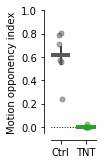

In [13]:
# Make Scatter Plot of MOI

pos = [0,1]

fig = plt.figure(figsize = (0.4*len(pos), 2.25))

ax = fig.add_subplot(111)
w = 0.6
wb = 0.6
data = [R24E09_TNT_Ctrl_MOI, MOI_flies]
colors = ['0.35', 'C2']

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

for j in range (len(data)):
    ax.plot([pos[j]-w/2, pos[j]+w/2],[np.mean(data[j]),np.mean(data[j])],
            color=colors[j], linestyle='-', linewidth = 4)
    ax.errorbar(pos[j],np.mean(data[j]),yerr=[stats.sem(data[j])], color='k',zorder = 0)    
    for i in range(len(data[j])):
        ax.scatter(pos[j] + np.random.random(1) * w/2 - w/4, data[j][i], s=25, color=colors[j], alpha=0.5, zorder = 2) 
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xticks(pos)
ax.set_xticklabels(('Ctrl', 'TNT'), size=10)
ax.set_ylabel('Motion opponency index', size=10)
ax.tick_params(axis='both', which='major', labelsize=10)
plt.ylim([-0.05,1])

bbox_inches = 'tight'
#plt.savefig('Fig2_R24E09_50384-TNT_MOI.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

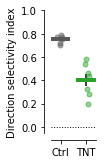

In [14]:
# Make Scatter Plot of LDir

pos = [0,1]

fig = plt.figure(figsize = (0.4*len(pos), 2.25))

ax = fig.add_subplot(111)
w = 0.6
wb = 0.6
data = [R24E09_TNT_Ctrl_LDir, LDir_flies]
colors = ['0.35', 'C2']

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

for j in range (len(data)):
    ax.plot([pos[j]-w/2, pos[j]+w/2],[np.mean(data[j]),np.mean(data[j])],
            color=colors[j], linestyle='-', linewidth = 4)
    ax.errorbar(pos[j],np.mean(data[j]),yerr=[stats.sem(data[j])], color='k',zorder = 0)    
    for i in range(len(data[j])):
        ax.scatter(pos[j] + np.random.random(1) * w/2 - w/4, data[j][i], s=25, color=colors[j], alpha=0.5, zorder = 2) 
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xticks(pos)
ax.set_xticklabels(('Ctrl', 'TNT'), size=10)
ax.set_ylabel('Direction selectivity index', size=10)
ax.tick_params(axis='both', which='major', labelsize=10)
plt.ylim([-0.05,1])

bbox_inches = 'tight'
#plt.savefig('Fig2_R24E09_50384-TNT_LDir.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

In [15]:
print(stats.shapiro(R24E09_TNT_Ctrl_MOI))
print(stats.shapiro(MOI_flies))
print(stats.levene(MOI_flies, R24E09_TNT_Ctrl_MOI))
print(stats.ttest_ind(R24E09_TNT_Ctrl_MOI, MOI_flies, axis=0, equal_var=False))

(0.8736805319786072, 0.24127419292926788)
(0.5364698171615601, 4.6927529183449224e-05)
LeveneResult(statistic=10.03938244774426, pvalue=0.008942504137061803)
Ttest_indResult(statistic=7.167349408225972, pvalue=0.0008134355965976256)


In [16]:
print(stats.shapiro(R24E09_TNT_Ctrl_LDir))
print(stats.shapiro(LDir_flies))
print(stats.levene(LDir_flies, R24E09_TNT_Ctrl_LDir))
print(stats.ttest_ind(R24E09_TNT_Ctrl_LDir, LDir_flies, axis=0, equal_var=False))

(0.9245194792747498, 0.5384910106658936)
(0.9603171944618225, 0.8214513659477234)
LeveneResult(statistic=6.51655480352424, pvalue=0.02686301659797771)
Ttest_indResult(statistic=6.336405513245997, pvalue=0.0004719748566017207)
